In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:
filepath = r'sample_ssca2_1m.gr'

In [33]:
in_dict = {}
out_dict = {}

with open(filepath) as fp:
  flag = False

  line = fp.readline()
  cnt = 1

  while line:

    line = fp.readline()
    cnt += 1

    line_list = line.split(" ")
    # print(line_list)
    if len(line_list) < 4:
      break
   
    if line_list[0] == 'p':
      flag = True
      continue
    
    if flag == False:
      continue
    
    # print("Line {}: {}".format(cnt, line.strip()))
    out_node = int(line_list[1])
    in_node = int(line_list[2])
    weight = int(line_list[3])

    if in_node not in in_dict:
      in_dict[in_node] = 0
    in_dict[in_node] += 1

    if out_node not in out_dict:
      out_dict[out_node] = 0
    out_dict[out_node] += 1

print("done")


done


In [34]:
from pprint import pprint

In [35]:
# pprint(sum(out_dict.values()))

In [36]:
# import operator
# max_k = max(out_dict.items(), key=operator.itemgetter(1))[0]
# max_v = max(out_dict.items(), key=operator.itemgetter(1))[1]
# print(max_k)
# print(max_v)

In [37]:
import matplotlib.pyplot as plt

In [38]:
import operator
sorted_out_dict = sorted(out_dict.items(), key=operator.itemgetter(0))
sorted_in_dict = sorted(in_dict.items(), key=operator.itemgetter(0))

In [39]:
# print(sorted_out_dict)

In [40]:
out_degree_dict = {}
in_degree_dict = {}



for n, o in sorted_out_dict:

  if o not in out_degree_dict:
    out_degree_dict[o] = 0
  out_degree_dict[o] += 1



for n, o in sorted_in_dict:

  if o not in in_degree_dict:
    in_degree_dict[o] = 0
  in_degree_dict[o] += 1


In [41]:
print(out_degree_dict)
print(in_degree_dict)

{14: 107110, 6: 57920, 15: 72272, 5: 49342, 13: 113714, 10: 91745, 3: 29729, 12: 108831, 11: 101395, 7: 65935, 17: 3285, 16: 18583, 4: 39707, 8: 74044, 9: 83289, 2: 19664, 1: 9215, 18: 342, 20: 2, 19: 32}
{16: 18548, 2: 19758, 15: 72131, 13: 114051, 5: 49348, 14: 106685, 10: 91713, 4: 39838, 7: 65617, 12: 108654, 9: 83060, 8: 74313, 11: 101416, 6: 57870, 3: 29702, 1: 9264, 17: 3573, 18: 498, 19: 55, 21: 1, 20: 3}


In [42]:
on = []
ox = []
oy = []

point_sum = sum(out_degree_dict.values())

for d,c in out_degree_dict.items():
  on.append(d)
  ox.append(c)
  oy.append(c/point_sum)

In [43]:
print(on)
print(ox)
print(oy)

[14, 6, 15, 5, 13, 10, 3, 12, 11, 7, 17, 16, 4, 8, 9, 2, 1, 18, 20, 19]
[107110, 57920, 72272, 49342, 113714, 91745, 29729, 108831, 101395, 65935, 3285, 18583, 39707, 74044, 83289, 19664, 9215, 342, 2, 32]
[0.10238434803222464, 0.05536459189642845, 0.06908338718126168, 0.04716504995430892, 0.10869698209444863, 0.08769724591743487, 0.028417367964242428, 0.10402941817472729, 0.0969214916322231, 0.06302597318181992, 0.0031400670645678084, 0.01776312519356578, 0.037955142445294965, 0.07077720722339689, 0.0796143213822795, 0.01879643188969905, 0.00880843774733405, 0.0003269110916536348, 1.9117607699042974e-06, 3.058817231846876e-05]


In [44]:
print(sum(oy))

1.0


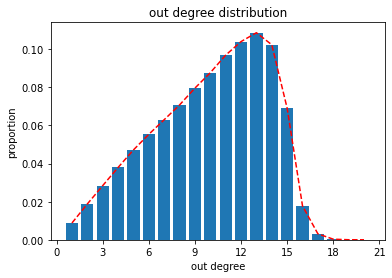

In [53]:
from matplotlib.ticker import MaxNLocator
bins = sorted(on.copy())
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(bins, [out_degree_dict[i]/sum(out_degree_dict.values()) for i in bins], 'r--')
plt.bar(on,oy) # A bar chart
plt.title('out degree distribution')
plt.xlabel('out degree')
plt.ylabel('proportion')


plt.show()

In [46]:
inn  = []
inx = []
iny = []

point_sum = sum(in_degree_dict.values())

for d,c in in_degree_dict.items():
  inn.append(d)
  inx.append(c)
  iny.append(c/point_sum)

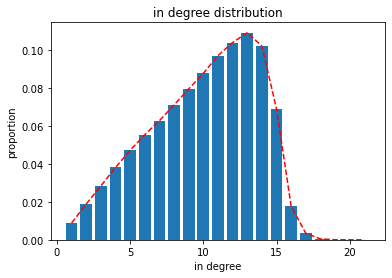

In [47]:
bins = sorted(inn.copy())

plt.bar(inn,iny) # A bar chart
plt.plot(bins, [in_degree_dict[i]/sum(in_degree_dict.values()) for i in bins], 'r--')
plt.title('in degree distribution')
plt.xlabel('in degree')
plt.ylabel('proportion')
plt.show()